# Dataset Analysis
The *Adult Dataset*, from a 1994 US Census, contains information on a set of citizens, including their age, workclass, final weight, education, marital status, relationship, race, sex, capital gain, capital loss, occupation, work hours per week and native country.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
         'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']

adult_df = pd.read_csv("data/adult.data", sep=r"\s*,\s*", na_values="?", names=names, engine="python", index_col=False)
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Feature Analysis
This dataset is comprised of both numeric and categorical values. Moreover, the categorical values cannot be easily converted into numerical, which would be the case if the categories were, for example, "True" and "False" or "Low", "Medium" and "High". This being the case, to be able to use a KNN classifier, the categorical features were dropped.

In [3]:
numeric_names = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

numeric_adult_df = adult_df[numeric_names]
numeric_adult_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


The second issue that must be dealt with is the range of each numeric feature, as a difference of 20 in age means something different from a difference of 20 in work hours. To normalize the data, all values are changed to fall within the range of 0 to 1. This is the main dataset used in the KNN classifier.

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()
scaler.fit(numeric_adult_df) 

scaled_data = scaler.transform(numeric_adult_df)
scaled_adult_df = pd.DataFrame(data=scaled_data, columns=numeric_names)
scaled_adult_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


Finally, a discretized version of the numeric dataset is also used as a point of comparison for the scaled dataset, as they both coerce the data into falling within a specific range. The number of groups chosen is 5 and the groups are separated uniformly.

In [6]:
from sklearn.preprocessing import KBinsDiscretizer

In [7]:
enc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy="uniform")
discretized_data = enc.fit_transform(numeric_adult_df)

discretized_adult_df = pd.DataFrame(columns=numeric_names, data=discretized_data)
discretized_adult_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,1.0,0.0,4.0,0.0,0.0,1.0
1,2.0,0.0,4.0,0.0,0.0,0.0
2,1.0,0.0,2.0,0.0,0.0,1.0
3,2.0,0.0,2.0,0.0,0.0,1.0
4,0.0,1.0,4.0,0.0,0.0,1.0


## Missing Data

To deal with missing data, first we must check the number of missing values per column:

In [8]:
{name: numeric_adult_df[name].isna().sum() for name in numeric_names}

{'age': 0,
 'fnlwgt': 0,
 'education-num': 0,
 'capital-gain': 0,
 'capital-loss': 0,
 'hours-per-week': 0}

As there is no missing values in the numeric columns, a solution will not be needed for the KNN classfier.

## Test Data

In [9]:
test_df = pd.read_csv("data/adult.test", sep=r"\s*,\s*", na_values="?", names=names, engine="python", index_col=False, skiprows=1)
test_df["class"] = test_df["class"].str.replace(".", "", regex=False)
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [10]:
numeric_test_df = test_df[numeric_names]
numeric_test_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30


In [11]:
scaled_data = scaler.transform(numeric_test_df)
scaled_test_df = pd.DataFrame(data=scaled_data, columns=numeric_names)
scaled_test_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.109589,0.145690,0.400000,0.000000,0.0,0.397959
1,0.287671,0.052654,0.533333,0.000000,0.0,0.500000
2,0.150685,0.220498,0.733333,0.000000,0.0,0.397959
3,0.369863,0.100541,0.600000,0.076881,0.0,0.397959
4,0.013699,0.061947,0.600000,0.000000,0.0,0.295918


In [12]:
enc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy="uniform")
discretized_test_data = enc.fit_transform(numeric_test_df)

discretized_test_df = pd.DataFrame(columns=numeric_names, data=discretized_test_data)
discretized_test_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.0,0.0,2.0,0.0,0.0,1.0
1,1.0,0.0,2.0,0.0,0.0,2.0
2,0.0,1.0,3.0,0.0,0.0,1.0
3,1.0,0.0,3.0,0.0,0.0,1.0
4,0.0,0.0,3.0,0.0,0.0,1.0


# KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [14]:
X = scaled_adult_df
y = adult_df["class"]

test_X = scaled_test_df
test_y = test_df["class"]

The first test was made using the 3 nearest neighbours:

In [15]:
neigh = KNeighborsClassifier(n_neighbors=3)

for k_fold in [3, 5, 10]:
    cross_val_scores = cross_val_score(neigh, X, y, cv=k_fold)
    avg_score = sum(cross_val_scores) / k_fold
    print(f"Avg. accuracy with {k_fold}-fold validation: {avg_score}")

Avg. accuracy with 3-fold validation: 0.7899020136046712
Avg. accuracy with 5-fold validation: 0.7909767310964917
Avg. accuracy with 10-fold validation: 0.7912224869662696


Using the 5 nearest neighbours, the average accuracy goes slightly up:

In [16]:
neigh = KNeighborsClassifier(n_neighbors=5)

for k_fold in [3, 5, 10]:
    cross_val_scores = cross_val_score(neigh, X, y, cv=k_fold)
    avg_score = sum(cross_val_scores) / k_fold
    print(f"Avg. accuracy with {k_fold}-fold validation: {avg_score}")

Avg. accuracy with 3-fold validation: 0.7996376274137319
Avg. accuracy with 5-fold validation: 0.8017260131032586
Avg. accuracy with 10-fold validation: 0.8020637934247083


To estimate the most appropriate value for K (within a specific range), we can compare the accuracy of the model using each K. The range used was 5 to 50 and the accuracy was found using 5-fold cross-validation.

In [17]:
accuracies = []
for k in range(5, 51):
    neigh = KNeighborsClassifier(n_neighbors=k)
    cross_val_scores = cross_val_score(neigh, X, y, cv=5)
    avg_score = sum(cross_val_scores) / 5.0
    accuracies.append(avg_score)

<AxesSubplot:xlabel='k', ylabel='accuracy'>

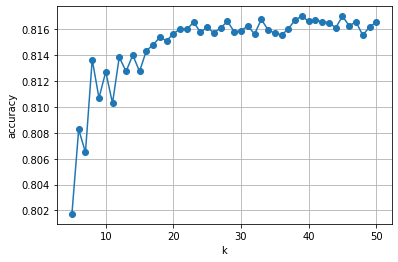

In [18]:
pd.Series(data=accuracies, index=range(5, 51)).plot(xlabel="k", ylabel="accuracy", style="o-", grid=True)

The best accuracy was found with:

In [19]:
k = 39

With that, the test data can be used to validate the model (holdout method): 

In [20]:
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=39)

In [21]:
predicted_y = neigh.predict(test_X)

In [22]:
correct = sum(test_y == predicted_y)
incorrect = sum(test_y != predicted_y)
total = correct + incorrect

pd.DataFrame(index=["Correct", "Incorrect", "Total"], columns=["N", "%"],
             data=[[correct, 100*correct/total], [incorrect, 100*incorrect/total], [total, 100]])

,N,%
Correct,13265,81.475339
Incorrect,3016,18.524661
Total,16281,100.000000


With these results, it is estimated that the accuracy of the model is of 77% (aprox.).

## Accuracy, Precision and Recall

In [23]:
from sklearn.metrics import accuracy_score

Considering the target class is ">50K", it is possible to calculate the true positive, the true negative, the false positive and the false negative ratios:

In [24]:
res = {
    "TP": test_df[(predicted_y == ">50K") & (test_df["class"] == ">50K")].shape[0],
    "TN": test_df[(predicted_y == "<=50K") & (test_df["class"] == "<=50K")].shape[0],
    "FP": test_df[(predicted_y == ">50K") & (test_df["class"] == "<=50K")].shape[0],
    "FN": test_df[(predicted_y == "<=50K") & (test_df["class"] == ">50K")].shape[0]
}
res

{'TP': 1534, 'TN': 11731, 'FP': 704, 'FN': 2312}

With these ratios, the precision, recall and F1-score can be calculated as well:

In [25]:
{
    "Precision": res["TP"]/(res["TP"] + res["FP"]),
    "Recall": res["TP"]/(res["TP"] + res["FN"]),
    "F1-score": 2*res["TP"]/(2*res["TP"] + res["FP"] + res["FN"]),
    "Accuracy": accuracy_score(test_y, predicted_y)
}

{'Precision': 0.6854334226988382,
 'Recall': 0.39885595423816955,
 'F1-score': 0.5042735042735043,
 'Accuracy': 0.8147533935261961}

From these results, it is possible to see that the poor precision has a big impact on the overall quality of the model. One way to improve the model is to change the hyperparameters on the KNN classifier so that the features that most correlate with the target class have more influence over the classification.

In [26]:
correlation_df = adult_df.copy()
correlation_df["class_as_number"] = 0
correlation_df.loc[correlation_df["class"].str.contains(">50K"), "class_as_number"] = 1

correlation_df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,class_as_number
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K,1


In [27]:
corr = abs(correlation_df.corr())

In [28]:
weights = corr.loc["class_as_number"][:-1]
weights

age               0.234037
fnlwgt            0.009463
education-num     0.335154
capital-gain      0.223329
capital-loss      0.150526
hours-per-week    0.229689
Name: class_as_number, dtype: float64

In [29]:
weighted_adult_df = scaled_adult_df.copy()
weighted_test_df = scaled_test_df.copy()

for name in numeric_names:
    weighted_adult_df[name] = weighted_adult_df[name] * weights.loc[name]
    weighted_test_df[name] = weighted_test_df[name] * weights.loc[name]
    
weighted_adult_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.070532,0.000419,0.268123,0.004855,0.0,0.091407
1,0.105798,0.000456,0.268123,0.000000,0.0,0.028125
2,0.067326,0.001307,0.178749,0.000000,0.0,0.091407
3,0.115416,0.001429,0.134062,0.000000,0.0,0.091407
4,0.035266,0.002096,0.268123,0.000000,0.0,0.091407


In [30]:
X = weighted_adult_df
test_X = weighted_test_df

neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X, y)

predicted_y = neigh.predict(test_X)

correct = sum(test_y == predicted_y)
incorrect = sum(test_y != predicted_y)
total = correct + incorrect

pd.DataFrame(index=["Correct", "Incorrect", "Total"], columns=["N", "%"],
             data=[[correct, 100*correct/total], [incorrect, 100*incorrect/total], [total, 100]])

,N,%
Correct,13312,81.764019
Incorrect,2969,18.235981
Total,16281,100.000000


In [31]:
res = {
    "TP": test_df[(predicted_y == ">50K") & (test_df["class"] == ">50K")].shape[0],
    "TN": test_df[(predicted_y == "<=50K") & (test_df["class"] == "<=50K")].shape[0],
    "FP": test_df[(predicted_y == ">50K") & (test_df["class"] == "<=50K")].shape[0],
    "FN": test_df[(predicted_y == "<=50K") & (test_df["class"] == ">50K")].shape[0]
}
res

{'TP': 1590, 'TN': 11722, 'FP': 713, 'FN': 2256}

In [32]:
{
    "Precision": res["TP"]/(res["TP"] + res["FP"]),
    "Recall": res["TP"]/(res["TP"] + res["FN"]),
    "F1-score": 2*res["TP"]/(2*res["TP"] + res["FP"] + res["FN"]),
    "Accuracy": accuracy_score(test_y, predicted_y)
}

{'Precision': 0.6904038211029092,
 'Recall': 0.41341653666146644,
 'F1-score': 0.5171572613433079,
 'Accuracy': 0.8176401940912721}

Using different weights on each feature, the precision was raised to 0.69, the recall was raised to 0.41 and the F1-score was raised to 0.51.

Finally, as a point of comparison, the discretized data is used:

In [33]:
X = discretized_adult_df
test_X = discretized_test_df

neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X, y)

predicted_y = neigh.predict(test_X)

correct = sum(test_y == predicted_y)
incorrect = sum(test_y != predicted_y)
total = correct + incorrect

pd.DataFrame(index=["Correct", "Incorrect", "Total"], columns=["N", "%"],
             data=[[correct, 100*correct/total], [incorrect, 100*incorrect/total], [total, 100]])

,N,%
Correct,13073,80.296051
Incorrect,3208,19.703949
Total,16281,100.000000


In [34]:
res = {
    "TP": test_df[(predicted_y == ">50K") & (test_df["class"] == ">50K")].shape[0],
    "TN": test_df[(predicted_y == "<=50K") & (test_df["class"] == "<=50K")].shape[0],
    "FP": test_df[(predicted_y == ">50K") & (test_df["class"] == "<=50K")].shape[0],
    "FN": test_df[(predicted_y == "<=50K") & (test_df["class"] == ">50K")].shape[0]
}
res

{'TP': 1408, 'TN': 11665, 'FP': 770, 'FN': 2438}

In [35]:
{
    "Precision": res["TP"]/(res["TP"] + res["FP"]),
    "Recall": res["TP"]/(res["TP"] + res["FN"]),
    "F1-score": 2*res["TP"]/(2*res["TP"] + res["FP"] + res["FN"]),
    "Accuracy": accuracy_score(test_y, predicted_y)
}

{'Precision': 0.6464646464646465,
 'Recall': 0.3660946437857514,
 'F1-score': 0.4674634794156706,
 'Accuracy': 0.8029605061114182}

With these results, it seems the model is not an improvement over the normalized dataset's model.

# Classification Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

While classification trees (or decision trees) can use both numeric and categorical values, **scikit-learn**'s algorithm cannot. With that in mind, the same numeric dataset used in the KNN classifier will also be used with this classifier (although there is no need to scale the values in this case, as this algorithm does not rely on distance between observations).

In [37]:
X = numeric_adult_df
test_X = numeric_test_df

clf = DecisionTreeClassifier()
clf.fit(X, y)

predicted_y = clf.predict(test_X)

correct = sum(test_y == predicted_y)
incorrect = sum(test_y != predicted_y)
total = correct + incorrect

pd.DataFrame(index=["Correct", "Incorrect", "Total"], columns=["N", "%"],
             data=[[correct, 100*correct/total], [incorrect, 100*incorrect/total], [total, 100]])

,N,%
Correct,12542,77.03458
Incorrect,3739,22.96542
Total,16281,100.00000


With these results, it is estimated that the accuracy of the model is of 77% (aprox.), slightly worse than the KNN classifier.

## Accuracy, Precision and Recall
Considering the target class is ">50K", it is possible to calculate the true positive, the true negative, the false positive and the false negative ratios:

In [38]:
res = {
    "TP": test_df[(predicted_y == ">50K") & (test_df["class"] == ">50K")].shape[0],
    "TN": test_df[(predicted_y == "<=50K") & (test_df["class"] == "<=50K")].shape[0],
    "FP": test_df[(predicted_y == ">50K") & (test_df["class"] == "<=50K")].shape[0],
    "FN": test_df[(predicted_y == "<=50K") & (test_df["class"] == ">50K")].shape[0]
}
res

{'TP': 2034, 'TN': 10508, 'FP': 1927, 'FN': 1812}

With these ratios, the precision, recall and F1-score can be calculated as well:

In [39]:
{
    "Precision": res["TP"]/(res["TP"] + res["FP"]),
    "Recall": res["TP"]/(res["TP"] + res["FN"]),
    "F1-score": 2*res["TP"]/(2*res["TP"] + res["FP"] + res["FN"]),
    "Accuracy": accuracy_score(test_y, predicted_y)
}

{'Precision': 0.5135066902297399,
 'Recall': 0.5288611544461779,
 'F1-score': 0.5210708338670424,
 'Accuracy': 0.770345801854923}

Hyperparameters can be changed in order to improve the model. For the example below, the minimum number of samples on either side of a split was raised from 1 (default) to 100.

In [40]:
X = numeric_adult_df
test_X = numeric_test_df

clf = DecisionTreeClassifier(min_samples_leaf=100)
clf.fit(X, y)

predicted_y = clf.predict(test_X)

correct = sum(test_y == predicted_y)
incorrect = sum(test_y != predicted_y)
total = correct + incorrect

res = {
    "TP": test_df[(predicted_y == ">50K") & (test_df["class"] == ">50K")].shape[0],
    "TN": test_df[(predicted_y == "<=50K") & (test_df["class"] == "<=50K")].shape[0],
    "FP": test_df[(predicted_y == ">50K") & (test_df["class"] == "<=50K")].shape[0],
    "FN": test_df[(predicted_y == "<=50K") & (test_df["class"] == ">50K")].shape[0]
}
res

{'TP': 1725, 'TN': 11811, 'FP': 624, 'FN': 2121}

In [41]:
{
    "Precision": res["TP"]/(res["TP"] + res["FP"]),
    "Recall": res["TP"]/(res["TP"] + res["FN"]),
    "F1-score": 2*res["TP"]/(2*res["TP"] + res["FP"] + res["FN"]),
    "Accuracy": accuracy_score(test_y, predicted_y)
}

{'Precision': 0.7343550446998723,
 'Recall': 0.4485179407176287,
 'F1-score': 0.5569007263922519,
 'Accuracy': 0.8313985627418463}

# Multilayer Perceptron

In [42]:
from sklearn.neural_network import MLPClassifier

To use the multilayer perceptron classifier, the number of hidden layers and the number of neurons must be chosen, based on the problem at hand. Considering the number of inputs (six numeric features) and the number of outputs (one class, ">50K"), it was decided that the neural network would have only one hidden layer, with 3 neurons (about the average of inputs and outputs). Due to the level of complexity of the system, this should be enough to produce a model close to as good as possible. Using the initial dataset, the results were not as good as the previous classifiers:

In [43]:
X = numeric_adult_df
test_X = numeric_test_df

clf = MLPClassifier(hidden_layer_sizes=3, max_iter=1000, random_state=0)
clf.fit(X, y)

predicted_y = clf.predict(test_X)

correct = sum(test_y == predicted_y)
incorrect = sum(test_y != predicted_y)
total = correct + incorrect

pd.DataFrame(index=["Correct", "Incorrect", "Total"], columns=["N", "%"],
             data=[[correct, 100*correct/total], [incorrect, 100*incorrect/total], [total, 100]])

,N,%
Correct,13055,80.185492
Incorrect,3226,19.814508
Total,16281,100.000000


## Accuracy, Precision and Recall
Considering the target class is ">50K", it is possible to calculate the true positive, the true negative, the false positive and the false negative ratios:

In [44]:
res = {
    "TP": test_df[(predicted_y == ">50K") & (test_df["class"] == ">50K")].shape[0],
    "TN": test_df[(predicted_y == "<=50K") & (test_df["class"] == "<=50K")].shape[0],
    "FP": test_df[(predicted_y == ">50K") & (test_df["class"] == "<=50K")].shape[0],
    "FN": test_df[(predicted_y == "<=50K") & (test_df["class"] == ">50K")].shape[0]
}
res

{'TP': 681, 'TN': 12374, 'FP': 61, 'FN': 3165}

In [45]:
{
    "Precision": res["TP"]/(res["TP"] + res["FP"]),
    "Recall": res["TP"]/(res["TP"] + res["FN"]),
    "F1-score": 2*res["TP"]/(2*res["TP"] + res["FP"] + res["FN"]),
    "Accuracy": accuracy_score(test_y, predicted_y)
}

{'Precision': 0.9177897574123989,
 'Recall': 0.17706708268330734,
 'F1-score': 0.2968613775065388,
 'Accuracy': 0.8018549229162828}

Using the scaled dataset, the results were considerably better and comparable to the previous classifiers:

In [46]:
X = scaled_adult_df
test_X = scaled_test_df

clf = MLPClassifier(hidden_layer_sizes=3, max_iter=1000, random_state=0)
clf.fit(X, y)

predicted_y = clf.predict(test_X)

correct = sum(test_y == predicted_y)
incorrect = sum(test_y != predicted_y)
total = correct + incorrect

pd.DataFrame(index=["Correct", "Incorrect", "Total"], columns=["N", "%"],
             data=[[correct, 100*correct/total], [incorrect, 100*incorrect/total], [total, 100]])

,N,%
Correct,13357,82.040415
Incorrect,2924,17.959585
Total,16281,100.000000


In [47]:
res = {
    "TP": test_df[(predicted_y == ">50K") & (test_df["class"] == ">50K")].shape[0],
    "TN": test_df[(predicted_y == "<=50K") & (test_df["class"] == "<=50K")].shape[0],
    "FP": test_df[(predicted_y == ">50K") & (test_df["class"] == "<=50K")].shape[0],
    "FN": test_df[(predicted_y == "<=50K") & (test_df["class"] == ">50K")].shape[0]
}
res

{'TP': 1781, 'TN': 11576, 'FP': 859, 'FN': 2065}

With these ratios, the precision, recall and F1-score can be calculated as well:

In [48]:
{
    "Precision": res["TP"]/(res["TP"] + res["FP"]),
    "Recall": res["TP"]/(res["TP"] + res["FN"]),
    "F1-score": 2*res["TP"]/(2*res["TP"] + res["FP"] + res["FN"]),
    "Accuracy": accuracy_score(test_y, predicted_y)
}

{'Precision': 0.6746212121212121,
 'Recall': 0.4630785231409256,
 'F1-score': 0.5491828553808202,
 'Accuracy': 0.8204041520791107}

Still, the main drawback of these models is the high number of false negatives. As they currently stand, the KNN model is still the best.